Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA Process

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data=data.drop('State',axis=1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
data1=data.rename(columns={'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS'})
data1

,RDS,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
data1[data1.duplicated]
#no duplicte values

,RDS,AD,MS,Profit


# correlation analysis

In [9]:
data1.corr()

,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


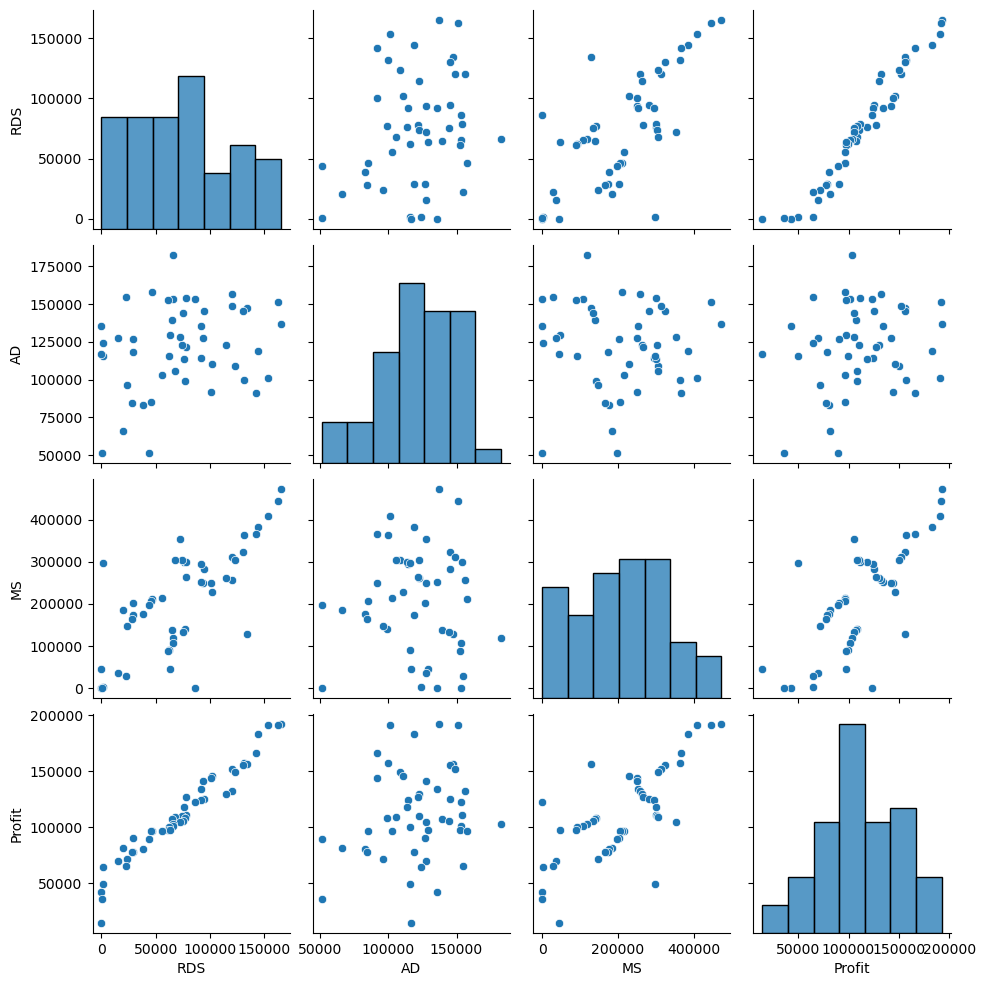

In [10]:
sns.set_style=('darkgrid')
sns.pairplot(data1)

# Square Transformation of data

In [52]:
model1=smf.ols('np.sqrt(Profit)~np.sqrt(RDS)',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     628.4
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.15e-29
Time:                        15:01:41   Log-Likelihood:                -212.93
No. Observations:                  50   AIC:                             429.9
Df Residuals:                      48   BIC:                             433.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      180.4037      6.402     28.181      0.000     167.533     193.275
np.sqrt(RDS)     0.5910      0.024     25.069      0.000       0.544       0.638
==============================================================================
Omnibus:                        8.023   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               16.216
Skew:                           0.032   Prob(JB):                     0.000301
Kurtosis:                       5.789   Cond. No.                         704.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model2=smf.ols('np.sqrt(Profit)~np.sqrt(AD)',data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.617
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.112
Time:                        15:02:35   Log-Likelihood:                -277.74
No. Observations:                  50   AIC:                             559.5
Df Residuals:                      48   BIC:                             563.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     208.6177     74.630      2.795      0.007      58.564     358.671
np.sqrt(AD)     0.3466      0.214      1.618      0.112      -0.084       0.777
==============================================================================
Omnibus:                        6.579   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.674
Skew:                          -0.632   Prob(JB):                       0.0586
Kurtosis:                       4.061   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model3=smf.ols('np.sqrt(Profit)~np.sqrt(MS)',data=data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     43.48
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.09e-08
Time:                        15:02:53   Log-Likelihood:                -262.95
No. Observations:                  50   AIC:                             529.9
Df Residuals:                      48   BIC:                             533.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     218.2805     18.009     12.120      0.000     182.070     254.491
np.sqrt(MS)     0.2585      0.039      6.594      0.000       0.180       0.337
==============================================================================
Omnibus:                       11.079   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.136
Skew:                          -0.630   Prob(JB):                     0.000190
Kurtosis:                       5.577   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model building

In [49]:
model=smf.ols("Profit~RDS+AD+MS",data=data1).fit()

# model testing

In [12]:
model.params

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [13]:
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 AD           -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 AD           0.60176
 MS           0.10472
 dtype: float64)

In [14]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [15]:
#build SLR and MLR models for significant variables AD and MS
#find tvalues and pvalues

In [16]:
slr_ad=smf.ols("Profit~AD",data=data1).fit()
slr_ad.tvalues,slr_ad.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [17]:
slr_ms=smf.ols("Profit~MS",data=data1).fit()
slr_ms.tvalues,slr_ms.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [18]:
mlr_ad=smf.ols("Profit~AD+MS",data=data1).fit()
mlr_ad.tvalues,mlr_ad.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

# model validation

In [19]:
# Collinearity Problem Check
#calculating VIF=1/(1-Rsuared)for all independent

In [20]:
rsq_r=smf.ols("RDS~AD+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols("AD~RDS+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols("MS~RDS+AD",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)
d1={'variables':['RDS','AD','MS'],'vif':[vif_r,vif_a,vif_m]}
vif_df=pd.DataFrame(d1)
vif_df

,variables,vif
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


In [21]:
#none variable has VIF>20, no collinearity,so consider all variables in regression equation

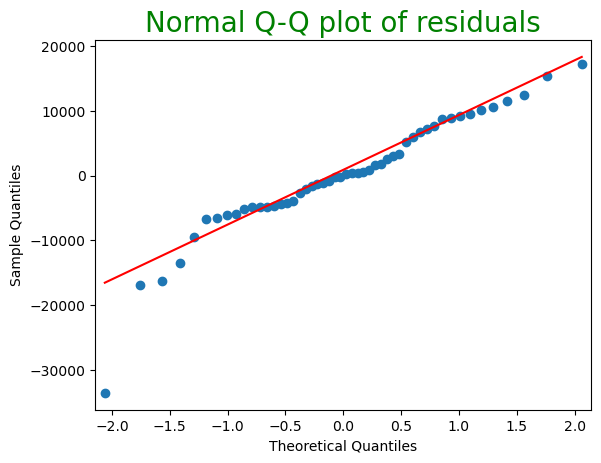

In [22]:
#Residual Analysis
#test for normality of residuals (Q-Q plot)using resudial model(model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals",color="green",size=20)
plt.show()

In [23]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

In [24]:
def standard_values(vals):
    return (vals)

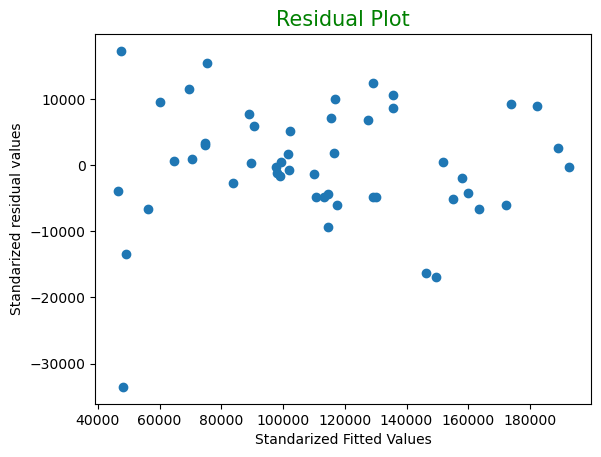

In [25]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot',color="green",size=15)
plt.xlabel('Standarized Fitted Values')
plt.ylabel('Standarized residual values')
plt.show()

In [26]:
# test for errors or residuals vs Regressors or independent x variables
#using Residuals Regression plots code graphics.plot_regress_exog(model,'x',fig)

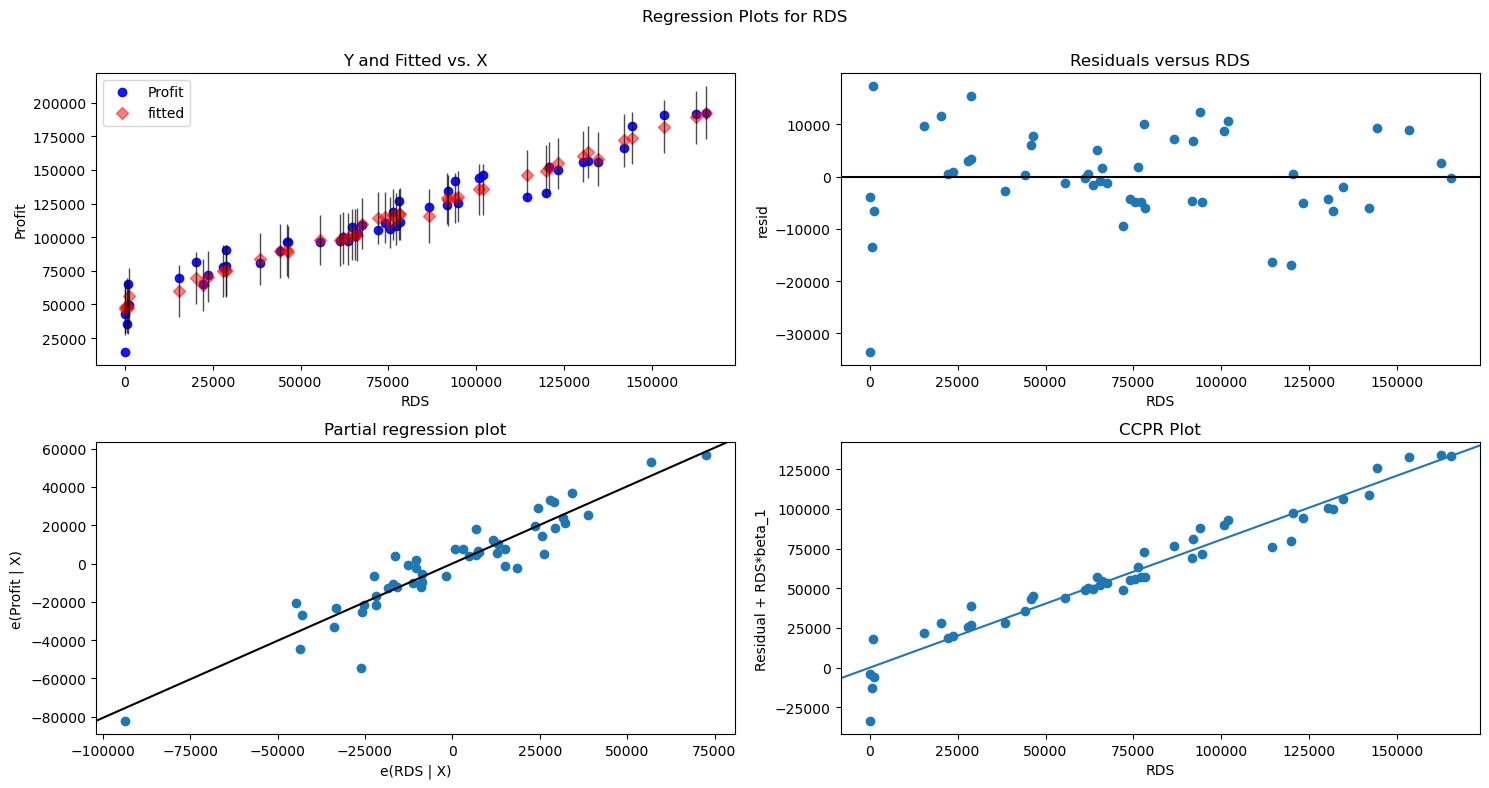

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

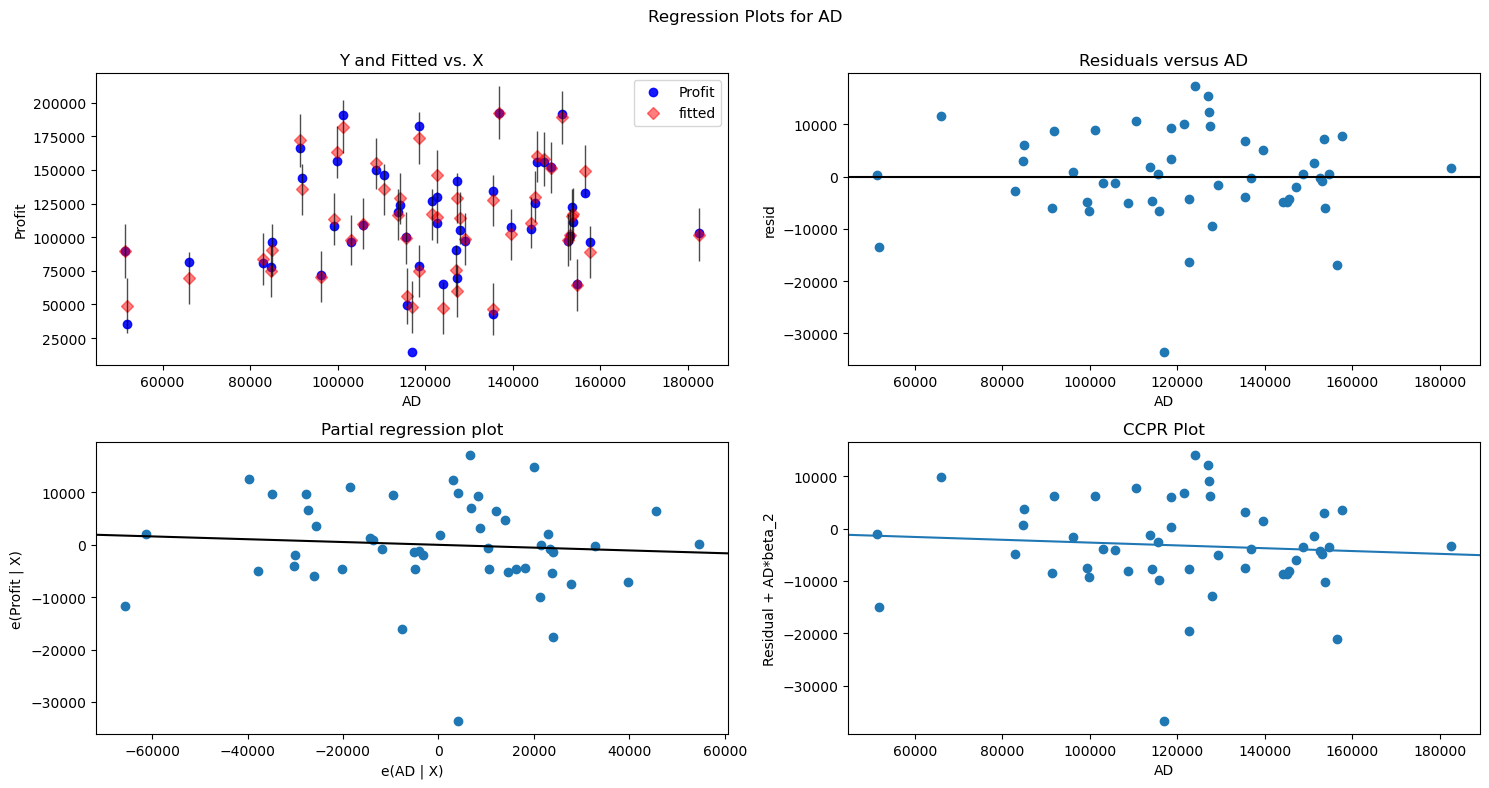

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

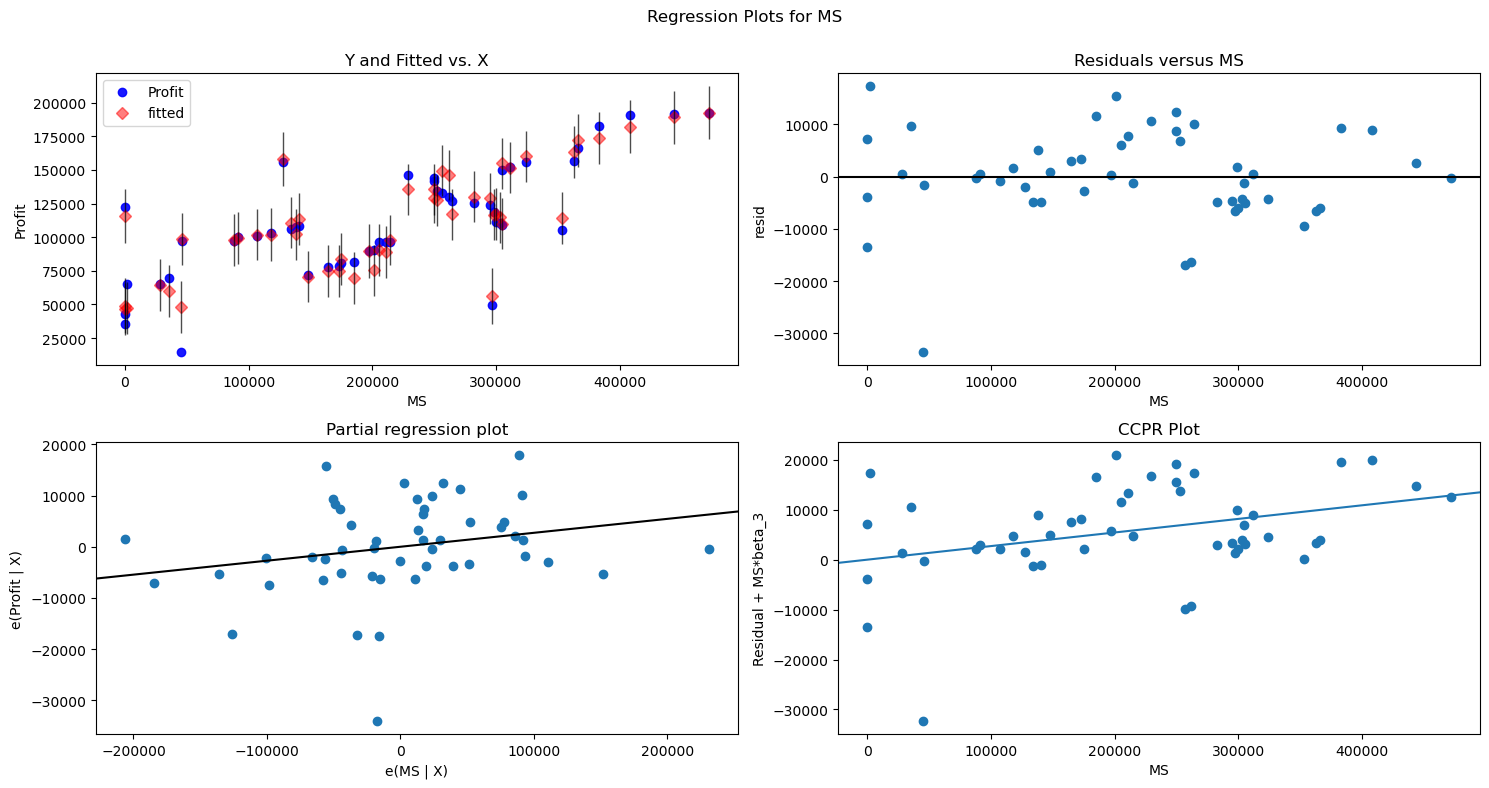

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [29]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

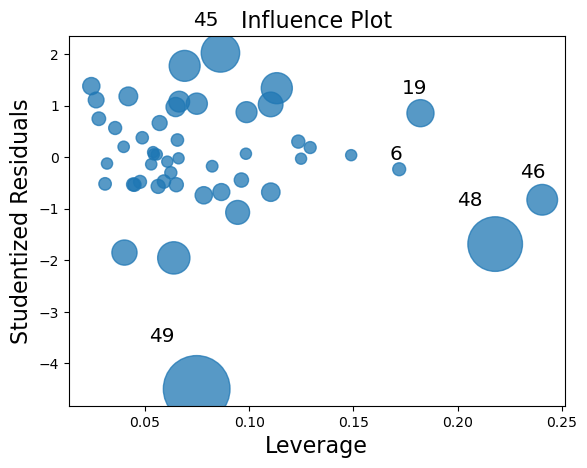

In [30]:
influence_plot(model)
plt.show()

In [31]:
#Levarage Cuttoff value=3*(k+1)/n
#k=no.of features/columns and n=no.of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.3

In [32]:
data1[data1.index.isin([49])]

,RDS,AD,MS,Profit
49,0.0,116983.8,45173.06,14681.4


# improving the model

In [33]:
#Discard the data points are influencers and reassign the row number
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model Deletion Diagnostics and Final Model

In [34]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+AD+MS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+AD+MS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [35]:
final_model.rsquared

0.9613162435129847

In [36]:
data2

,RDS,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# model predictions

In [37]:
new_data=pd.DataFrame({'RDS':70000,"AD":90000,"MS":140000},index=[0])
new_data

,RDS,AD,MS
0,70000,90000,140000


In [38]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [39]:
#prediction of price with 90.02% accuracy
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [40]:
d1={"prep_models":['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d1)
table

,prep_models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
